In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Configura el generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)

# Carga las imágenes del conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    'C:\\Users\\yeymigonzalez\\OneDrive - SETI S.A.S\\YGR\\Capacitaciones\\BootcampIA\\RedesNeuronales\\fruits-360_dataset_100x100\\fruits-360\\Training\\',
    target_size=(100, 100),  # Cambia el tamaño según tu modelo
    batch_size=128,
    class_mode='categorical',  # Cambia a 'binary' si es binario
    color_mode='rgb'            # Para imágenes a color
)

# Configura el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

# Carga las imágenes del conjunto de prueba
test_generator = test_datagen.flow_from_directory(
    'C:\\Users\\yeymigonzalez\\OneDrive - SETI S.A.S\\YGR\\Capacitaciones\\BootcampIA\\RedesNeuronales\\fruits-360_dataset_100x100\\fruits-360\\Test\\',
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb'            # Para imágenes a color
)

Found 70491 images belonging to 141 classes.
Found 23619 images belonging to 141 classes.


In [10]:
# 3. Extraer los datos de los generadores
x_train, y_train = next(train_generator)
x_test, y_test = next(test_generator)

In [27]:
# 2. Crear el modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))  # Capa de convolución
model.add(MaxPooling2D(pool_size=(2, 2)))  # Capa de pooling
model.add(Conv2D(64, (3, 3), activation='relu'))  # Otra capa de convolución
model.add(MaxPooling2D(pool_size=(2, 2)))  # Otra capa de pooling
model.add(Flatten())  # Aplanar la salida
model.add(Dense(128, activation='relu'))  # Capa densa
model.add(Dense(141, activation='softmax'))  # Capa de salida
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 141)            │        18,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,371,277 (16.68 MB)

 Trainable params: 4,371,277 (16.68 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#import tensorflow as tf
#from tensorflow.keras import layers, models

# Definición del modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3))) # (100, 100, 3) Tamaño en pixeles, 3 colores
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(141, activation='softmax'))  # Cambia 10 por el número de clases

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 141)            │        18,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,965 (6.68 MB)

 Trainable params: 1,749,965 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Entrenar el modelo
history = model.fit(
    train_generator,  # Generador de datos de entrenamiento
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Número de pasos por época
    validation_data=test_generator,  # Generador de datos de validación
    validation_steps=test_generator.samples // test_generator.batch_size,  # Número de pasos de validación
    epochs=5,
    verbose=1
)

Epoch 1/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1030s 2s/step - accuracy: 0.6987 - loss: 1.2726 - val_accuracy: 0.8972 - val_loss: 0.4561
Epoch 2/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9844 - loss: 0.0529 - val_accuracy: 0.9403 - val_loss: 0.2579
Epoch 3/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1116s 2s/step - accuracy: 0.9888 - loss: 0.0360 - val_accuracy: 0.9228 - val_loss: 0.3834
Epoch 4/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 55s 99ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.9254 - val_loss: 0.3496
Epoch 5/5
550/550 ━━━━━━━━━━━━━━━━━━━━ 1072s 2s/step - accuracy: 0.9932 - loss: 0.0245 - val_accuracy: 0.9471 - val_loss: 0.3434


In [22]:
# Suponiendo que se tiene una imagen o un conjunto de imágenes de entrada
# Ejemplo: x_test es el conjunto de datos de prueba
predictions = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [28]:
predicted_classes = np.argmax(predictions, axis=1) # obtener las clases predichas.
predicted_classes

array([  5, 117,  70, 113,  10, 128, 111,  42, 125, 128,  25, 120, 108,
        35, 125, 102,   3,  10, 108,  68,  51,   8,  61,  62,  81, 135,
        26,  83,  89, 134,  88, 113,  76, 121,  11,  76,   1,  20,   6,
       114,   2, 131,  14,  54,   8,   4,  48,  89,  55,  14,  60,  25,
        96,  50,  20,  18, 127,  86,  88,  82,  35,  18,  85,  48, 116,
         8,  49, 125,  99, 126, 105,  62,   8,  78,  89,  58,  51,  73,
        66,  46, 132,  58, 135, 120,  94,   5, 123,  87, 106, 109,  56,
        86,  98, 110,  76, 121, 136,  80, 140,  99, 117, 130,  75,  20,
        50, 100,   9,  88, 139, 104,  45, 112, 119,  57,  89,  63,  81,
       136,  11,  53,  57,  96,   6,  45,  81,  20,  42,  93], dtype=int64)

In [27]:
# Suponiendo que y_test está en formato categórico (one-hot encoded)
true_classes = np.argmax(y_test, axis=1)
true_classes


array([  6, 117,  70, 113,  10, 128, 111,  42, 125, 128,  25, 120, 108,
       102, 125, 102,   3,  10,  83,  68,  51,  87,  61,  62,  81, 135,
        26,  83,  89, 134,  88, 113,  93, 121,  11,  76,   1,  20,   6,
       114,   2, 131,  14,  54,   8,   4,  48,  89,  55,   4,  60,  25,
        96,  50,  20,  18, 127,  86,  88,  82,  35,  18,  85,  48, 116,
         8,  49, 125,  99, 126, 105,  62,   8,  78,  89,  58,  51,  73,
        66,  46, 132,  58, 135, 120,  94,   5, 123,  87, 106, 109,  56,
        86,  40, 110,  76, 121, 136,  80, 140,  99, 117, 130,  75,  20,
        50, 100,   9,  88, 139, 104,  45, 112, 119,  57,  91,  63,  81,
       136,  11,  53,  57,  96,   6,  45,  81,  20,  19,  93], dtype=int64)

In [29]:
# Comparar predicciones con clases verdaderas
comparison = np.vstack((true_classes, predicted_classes)).T
print(comparison)

[[  6   5]
 [117 117]
 [ 70  70]
 [113 113]
 [ 10  10]
 [128 128]
 [111 111]
 [ 42  42]
 [125 125]
 [128 128]
 [ 25  25]
 [120 120]
 [108 108]
 [102  35]
 [125 125]
 [102 102]
 [  3   3]
 [ 10  10]
 [ 83 108]
 [ 68  68]
 [ 51  51]
 [ 87   8]
 [ 61  61]
 [ 62  62]
 [ 81  81]
 [135 135]
 [ 26  26]
 [ 83  83]
 [ 89  89]
 [134 134]
 [ 88  88]
 [113 113]
 [ 93  76]
 [121 121]
 [ 11  11]
 [ 76  76]
 [  1   1]
 [ 20  20]
 [  6   6]
 [114 114]
 [  2   2]
 [131 131]
 [ 14  14]
 [ 54  54]
 [  8   8]
 [  4   4]
 [ 48  48]
 [ 89  89]
 [ 55  55]
 [  4  14]
 [ 60  60]
 [ 25  25]
 [ 96  96]
 [ 50  50]
 [ 20  20]
 [ 18  18]
 [127 127]
 [ 86  86]
 [ 88  88]
 [ 82  82]
 [ 35  35]
 [ 18  18]
 [ 85  85]
 [ 48  48]
 [116 116]
 [  8   8]
 [ 49  49]
 [125 125]
 [ 99  99]
 [126 126]
 [105 105]
 [ 62  62]
 [  8   8]
 [ 78  78]
 [ 89  89]
 [ 58  58]
 [ 51  51]
 [ 73  73]
 [ 66  66]
 [ 46  46]
 [132 132]
 [ 58  58]
 [135 135]
 [120 120]
 [ 94  94]
 [  5   5]
 [123 123]
 [ 87  87]
 [106 106]
 [109 109]
 [ 56  56]

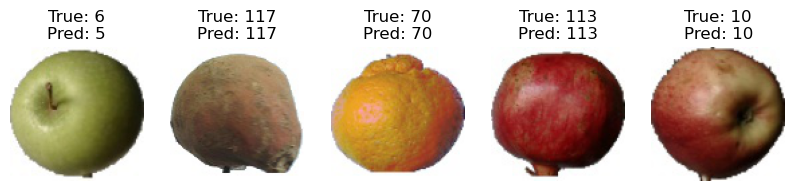

In [25]:
# Seleccionar algunas imágenes para visualizar
num_images = 5
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i].reshape(100, 100, 3))  # Redimensionar según sea necesario
    plt.title(f'True: {true_classes[i]}\nPred: {predicted_classes[i]}')
    plt.axis('off')

plt.show()